# 5. MGWR

## 5.1 MGWRとは何か

###5.1.1 GWRからMGWRへ

省略

###5.1.2 MGWRのポイント

省略

## 5.2 Pythonモジュールを利用したMGWR推定

###5.2.1 分析及び可視化の準備

In [1]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [2]:
%cd '/content/mount/MyDrive/SDS'

/content/mount/MyDrive/SDS


In [3]:
!pip install -q mgwr
!pip install -q geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 30.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

import libpysal as ps  # Georgiaデータのインポートのため
from mgwr.gwr import GWR, MGWR  # GWRとMGWRをインポートする
from mgwr.sel_bw import Sel_BW

###5.2.2 データのインポートと標準化

In [5]:
# Georgiaデータセットの読み込み
georgia = gpd.read_file(ps.examples.get_path('G_utm.shp'))

In [6]:
# 変数の作成
y = georgia['PctBach'].values.reshape((-1, 1))
X = georgia[['PctFB', 'PctBlack', 'PctRural']].values
u = georgia['X']
v = georgia['Y']
coords = list(zip(u, v))

In [7]:
# 変数の標準化
X = (X - X.mean(axis = 0)) / X.std(axis = 0)
y = (y - y.mean(axis = 0)) / y.std(axis = 0)

###5.2.3 最適バンド幅の選択

In [8]:
# MGWRのバンド幅の計算
# Sel_BWオブジェクトの作成
mgwr_selector = Sel_BW(coords, y, X, multi = True)
# searchメソッドで最適バンド幅を求める
#verbose=Trueでイタレーションごとの結果を返す
mgwr_bw = mgwr_selector.search(multi_bw_min=[2], verbose=True)
print(mgwr_bw)

Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

Current iteration: 1 ,SOC: 0.0175903
Bandwidths: 92.0, 23.0, 96.0, 145.0
Current iteration: 2 ,SOC: 0.0170023
Bandwidths: 92.0, 101.0, 101.0, 158.0
Current iteration: 3 ,SOC: 0.0021606
Bandwidths: 92.0, 101.0, 117.0, 158.0
Current iteration: 4 ,SOC: 0.0003894
Bandwidths: 92.0, 101.0, 117.0, 158.0
Current iteration: 5 ,SOC: 0.0011415
Bandwidths: 92.0, 101.0, 136.0, 158.0
Current iteration: 6 ,SOC: 0.0003585
Bandwidths: 92.0, 101.0, 136.0, 158.0
Current iteration: 7 ,SOC: 8.64e-05
Bandwidths: 92.0, 101.0, 136.0, 158.0
Current iteration: 8 ,SOC: 3.09e-05
Bandwidths: 92.0, 101.0, 136.0, 158.0
Current iteration: 9 ,SOC: 1.2e-05
Bandwidths: 92.0, 101.0, 136.0, 158.0
Current iteration: 10 ,SOC: 4.7e-06
Bandwidths: 92.0, 101.0, 136.0, 158.0
[ 92. 101. 136. 158.]


###5.2.4 MGWR推定と結果表示

In [9]:
# MGWR推定の実行
mgwr_results = MGWR(coords, y, X, mgwr_selector).fit()

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# サマリーの表示
mgwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 159
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             71.793
Log-likelihood:                                                    -162.399
AIC:                                                                332.798
AICc:                                                               335.191
BIC:                                                               -713.887
R2:                                                                   0.548
Adj. R2:                                                              0.540

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [11]:
# 各変数に関する加法項の有効パラメータ数
print('ENP_j：', mgwr_results.ENP_j)
# 各変数に係る加法項の修正alpha(5%有意)
print('adj_alpha_j：', mgwr_results.adj_alpha_j[:, 1])
# 修正されたt値の臨界値(5%有意)
print('critical_tval：', mgwr_results.critical_tval())

ENP_j： [3.84467108 3.51377081 2.25805253 1.75175646]
adj_alpha_j： [0.01300501 0.01422973 0.02214297 0.02854278]
critical_tval： [2.51210749 2.47888792 2.31069113 2.21000184]


In [12]:
print(f'Rssidual sum of squares: {mgwr_results.resid_ss:.3f}')
print(f'AIC: {mgwr_results.aic:.3f}')
print(f'AICc: {mgwr_results.aicc:.3f}')
print(f'BIC: {mgwr_results.bic:.3f}')
print(f'R2: {mgwr_results.R2:.3f}')
print(f'Adjusted R2: {mgwr_results.adj_R2:.3f}')

Rssidual sum of squares: 50.899
AIC: 294.849
AICc: 297.120
BIC: 332.806
R2: 0.680
Adjusted R2: 0.655


###5.2.5 ローカルな推定結果

In [13]:
# 可視化のため、Georgiaデータフレームに各推定パラメータ列を追加
georgia['mgwr_intercept'] = mgwr_results.params[:, 0]
georgia['mgwr_fb'] = mgwr_results.params[:, 1]
georgia['mgwr_aa'] = mgwr_results.params[:, 2]
georgia['mgwr_rural'] = mgwr_results.params[:, 3]

In [14]:
# 修正alphaに基づく5%有意なt値のみフィルタリング
mgwr_filtered_t = mgwr_results.filter_tvals()

###5.2.6 GWRとの比較

In [15]:
# GWRのバンド幅の計算
gwr_selector = Sel_BW(coords, y, X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

117.0


In [16]:
# GWR推定の実行
gwr_model = GWR(coords, y, X, gwr_bw)
gwr_results = gwr_model.fit()

In [17]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 159
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             71.793
Log-likelihood:                                                    -162.399
AIC:                                                                332.798
AICc:                                                               335.191
BIC:                                                               -713.887
R2:                                                                   0.548
Adj. R2:                                                              0.540

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [18]:
# 可視化のため、Georgiaデータフレームに各推定パラメータ列を追加
georgia['gwr_intercept'] = gwr_results.params[:, 0]
georgia['gwr_fb'] = gwr_results.params[:, 1]
georgia['gwr_aa'] = gwr_results.params[:, 2]
georgia['gwr_rural'] = gwr_results.params[:, 3]

In [19]:
# 修正alphaに基づく5%有意なt値のみフィルタリング
gwr_filtered_t = gwr_results.filter_tvals()

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


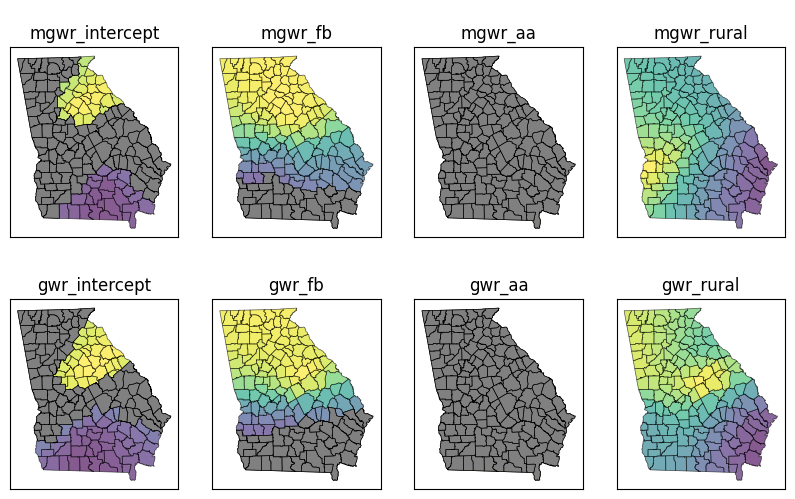

In [20]:
# 係数パラメータ名のリスト
mgwr_params_list = ['mgwr_intercept', 'mgwr_fb', 'mgwr_aa', 'mgwr_rural']
gwr_params_list = ['gwr_intercept', 'gwr_fb', 'gwr_aa', 'gwr_rural']

# 図の作成
fig, axes = plt.subplots(2, 4, figsize = (10, 6))

for i, ax in enumerate(axes.ravel()[:4]):  # axes.ravel()で2次元配列のaxesを1次元配列にする
  georgia.plot(mgwr_params_list[i], **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = ax)
  # 灰色部分を重ねる(mgwr_filtered_tの第1列がmgwr_interceptに対応している)
  georgia[mgwr_filtered_t[:, i] == 0].plot(color = 'grey', ax = ax, **{'edgecolor': 'black', 'linewidth': .5})
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title(mgwr_params_list[i])

for i, ax in enumerate(axes.ravel()[4:]):  # axes.ravel()で2次元配列のaxesを1次元配列にする
  georgia.plot(gwr_params_list[i], **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = ax)
  # 灰色部分を重ねる(gwr_filtered_tの第1列がgwr_interceptに対応している)
  georgia[gwr_filtered_t[:, i] == 0].plot(color = 'grey', ax = ax, **{'edgecolor': 'black', 'linewidth': .5})
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title(gwr_params_list[i])

plt.savefig('./Chapter5/figures/mgwr_gwr_filtered_params.png')
plt.show()

## 5.3 MGWRの理論的側面

###5.3.1 GAMとしてのMGWR

省略

###5.3.2 バックフィッティング・アルゴリズム

省略